# Part II - (Homicide)
## by (Layla Alsaabna)

## Investigation Overview


> In this investigation i aimed to explore the features of the Homicide Dataset that might influence homicide patterns, the primary focus was on these attributes:
 * 'Year'
 * 'Victim Age'
 * 'Victim Sex'
 * Perpetrator Age'
 * 'Perpetrator Sex'
 * 'Weapon'
 * 'State'
 * 'City'
 * 'Crime Solved'
 * 'relationship'
  


## Dataset Overview and Executive Summary


1) High Homicide Cities: Los Angeles and New York stand out as the cities with the highest number of homicides, likely due to their large populations and urban density.
2) California: This state recorded the highest number of homicides, reflecting its large population and numerous major cities.
3) Victim Age Distribution: The highest frequency of victims falls between the early 20s and early 30s, with notable peaks at ages 32, 22, 20, 25, and 21. This suggests that individuals in this age group are particularly vulnerable to homicide.
4) Perpetrator Age Distribution: The most frequent ages for perpetrators are between 20 and 30, with age 21 being the most common.
5) Handguns are the most commonly used weapon in homicides.
6) The most common relationships between victims and perpetrators are "Acquaintance" and "Stranger," indicating that investigators often start with people who know the victim.
7) Male Victims: Perpetrators of male victims tend to be younger adults, predominantly aged 18-32 years.
8)  Female Victims: Female victims show a broader distribution in the ages of perpetrators, extending into the late 30s and beyond, indicating that females may be more at risk from a wider age range of perpetrators.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("cleaned_data.csv")

In [4]:
df

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,27,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,29,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,23,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


## (Visualization 1)

> Write a comment about your visualization here.  Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations shoould be less than 50% of the number of visualizations in the exploratory analysis. Generally 3-5 visualizations suffice.


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots shown are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

In [7]:
color = sns.color_palette()
color4 = color[4]
color2 = color[2] 
color5 = color[5]
color6 = color[6]
color7 = color[7]

In [5]:

def plot_histogram_with_stats(df, column_name, color = 'tab:blue', bins = 20):
    """
    Plots a histogram for the specified column in the DataFrame and adds vertical lines for median and mean.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    """
    
    # Plot the histogram
    ax = df[column_name].plot(kind='hist', edgecolor='black', title=f'Histogram of {column_name}', color = color, bins = bins)
    
    # Calculate median and mean
    median = df[column_name].median()
    mean = df[column_name].mean()
    
    # Add vertical lines for median and mean
    ax.axvline(median, color='r', linestyle='--', linewidth=1, label='Median')
    ax.axvline(mean, color='b', linestyle='--', linewidth=1, label='Mean')
    
    # Add a legend
    plt.legend()

In [10]:

def plot_count_plot(df, column_name, color = 'tab:blue'):
    """
    Plots a countplot for the specified column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    """
    # Get the order of the column
    order = df[column_name].value_counts().index
    
    # Plot the countplot
    sns.countplot(data = df, y = column_name, edgecolor='black', color = color, order = order);
    plt.title(f'Histogram of {column_name}');
    
    
    # Add a legend
    plt.legend();

### How does the distribution of ages differ between victim and perpetrator?

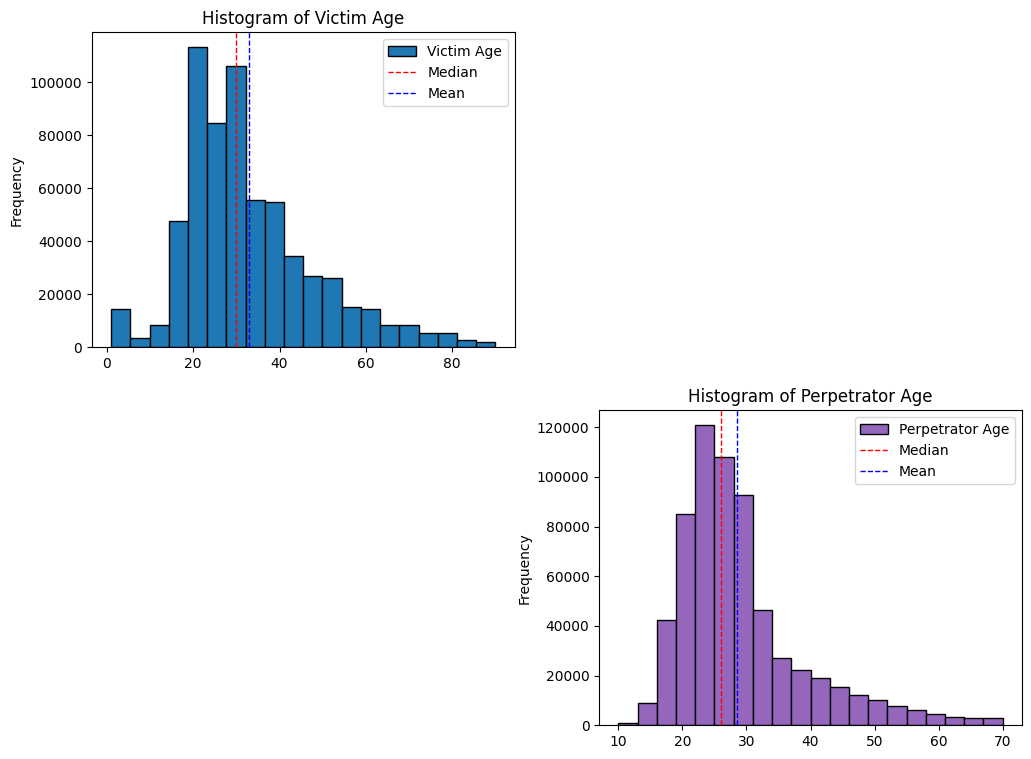

In [8]:
# plotting Victim Age and Perpetrator Age  on a standard scale

plt.figure(figsize=[12, 9])

# the Victim Age column
plt.subplot(2, 2, 1)
plot_histogram_with_stats(df, 'Victim Age')

# the Perpetrator Age column
plt.subplot(2, 2, 4)
plot_histogram_with_stats(df, 'Perpetrator Age', color = color4)

In [9]:
city_largest = df['City'].value_counts().nlargest(40)
city_largest = city_largest.reset_index(drop = False)

### Which city has the highest number of homicides?
### Which state has the highest total number of homicides?


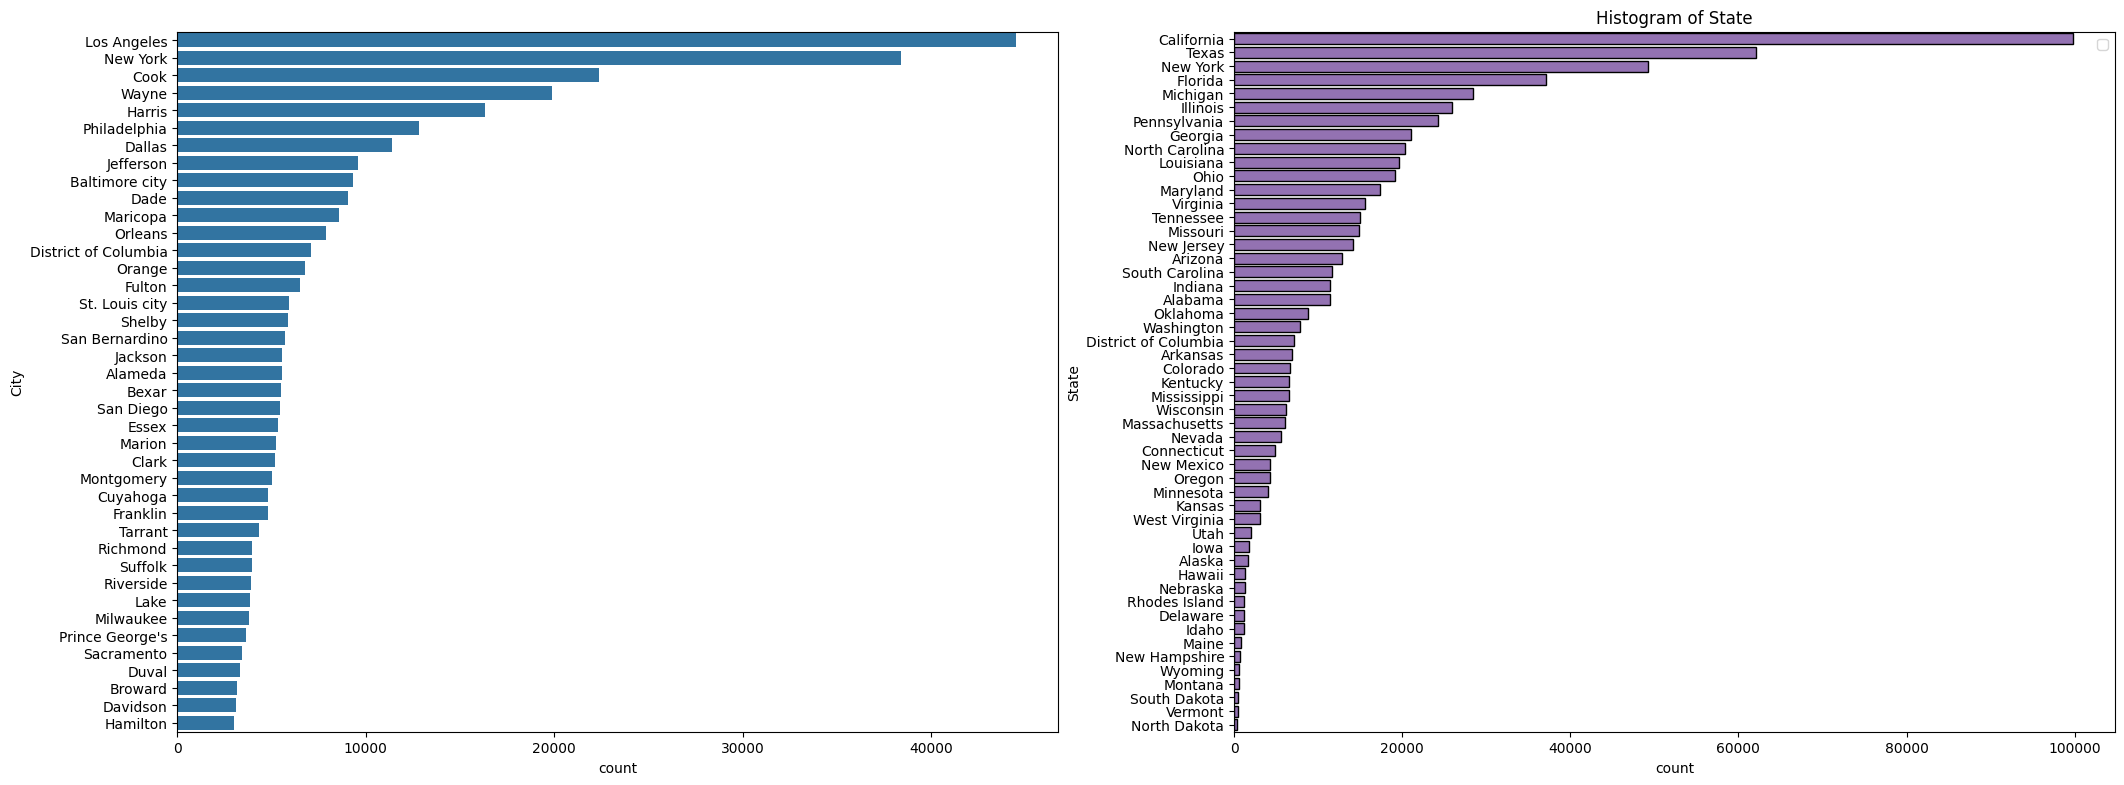

In [11]:
# plotting the 'City' and 'State' columns 
plt.figure(figsize=[25, 20])

# the Agency Code column
plt.subplot(2, 2, 1)
sns.barplot(data = city_largest, y = 'City',x = 'count', color = 'tab:blue');

# the Agency Name column
plt.subplot(2, 2, 2)
plot_count_plot(df, 'State', color = color4);

* Los Angeles and New York: These cities have the highest number of homicides, reflecting their large populations and urban density.
* California: This state has the highest number of homicides, possibly due to its large population and numerous major cities.
* Lower Homicide States: States like North Dakota and Vermont have significantly lower homicide counts, indicative of their smaller populations and rural settings.


### Are there any particular years with a higher concentration of victims within specific age ranges?

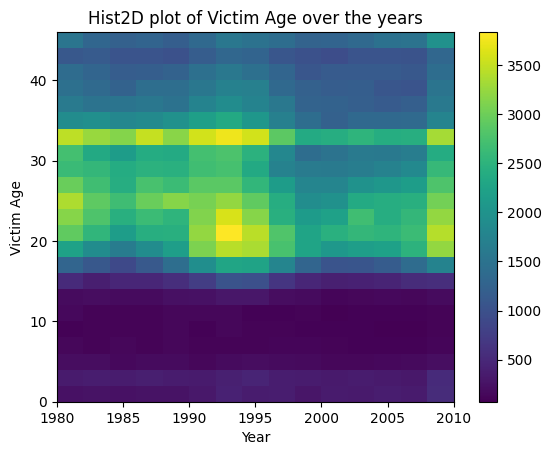

In [15]:
# Specify the bins for x axis and y axis for better understanding the trends of the victim age range being from 0 to 45
bins_x = np.arange(1980, 2010+2, 2)
bins_y = np.arange(0, 45+2, 2)
plt.hist2d(data=df, x='Year', y='Victim Age', bins=[bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Year')
plt.ylabel('Victim Age')
plt.title('Hist2D plot of Victim Age over the years');

**Cluster in the Early 90s**: A significant concentration of cases is observed between the years 1991 and 1995, particularly among victims aged 18 to 25.This indicates a higher frequency of younger victims during this period.

### Are there any particular years with a higher concentration of perpetrators within specific age ranges?

Text(0.5, 1.0, 'Hist2D plot of Perpetrator Age over the years')

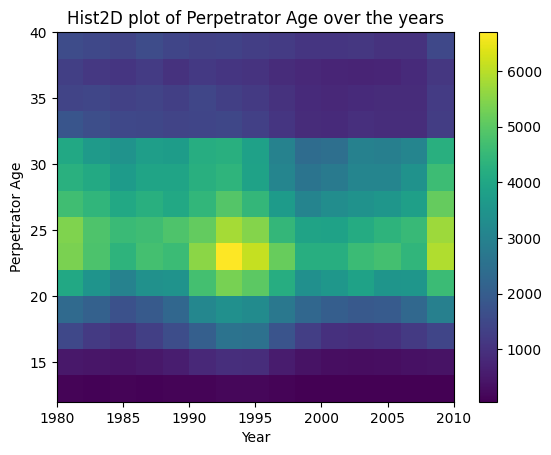

In [14]:
bins_x = np.arange(1980, 2010+2, 2)
bins_y = np.arange(12, 40+2, 2)
plt.hist2d(data=df, x='Year', y='Perpetrator Age', bins=[bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Year')
plt.ylabel('Perpetrator Age')
plt.title('Hist2D plot of Perpetrator Age over the years')

**Prominent Cluster (1990-1996)**: There is a noticeable concentration of cases between the years 1990 and 1996, where the perpetrators' ages predominantly range from 20 to 26. This suggests an increased frequency of homicides involving younger perpetrators during this timeframe.

### How does the relationship between victim age and perpetrator age vary across different weapon types?

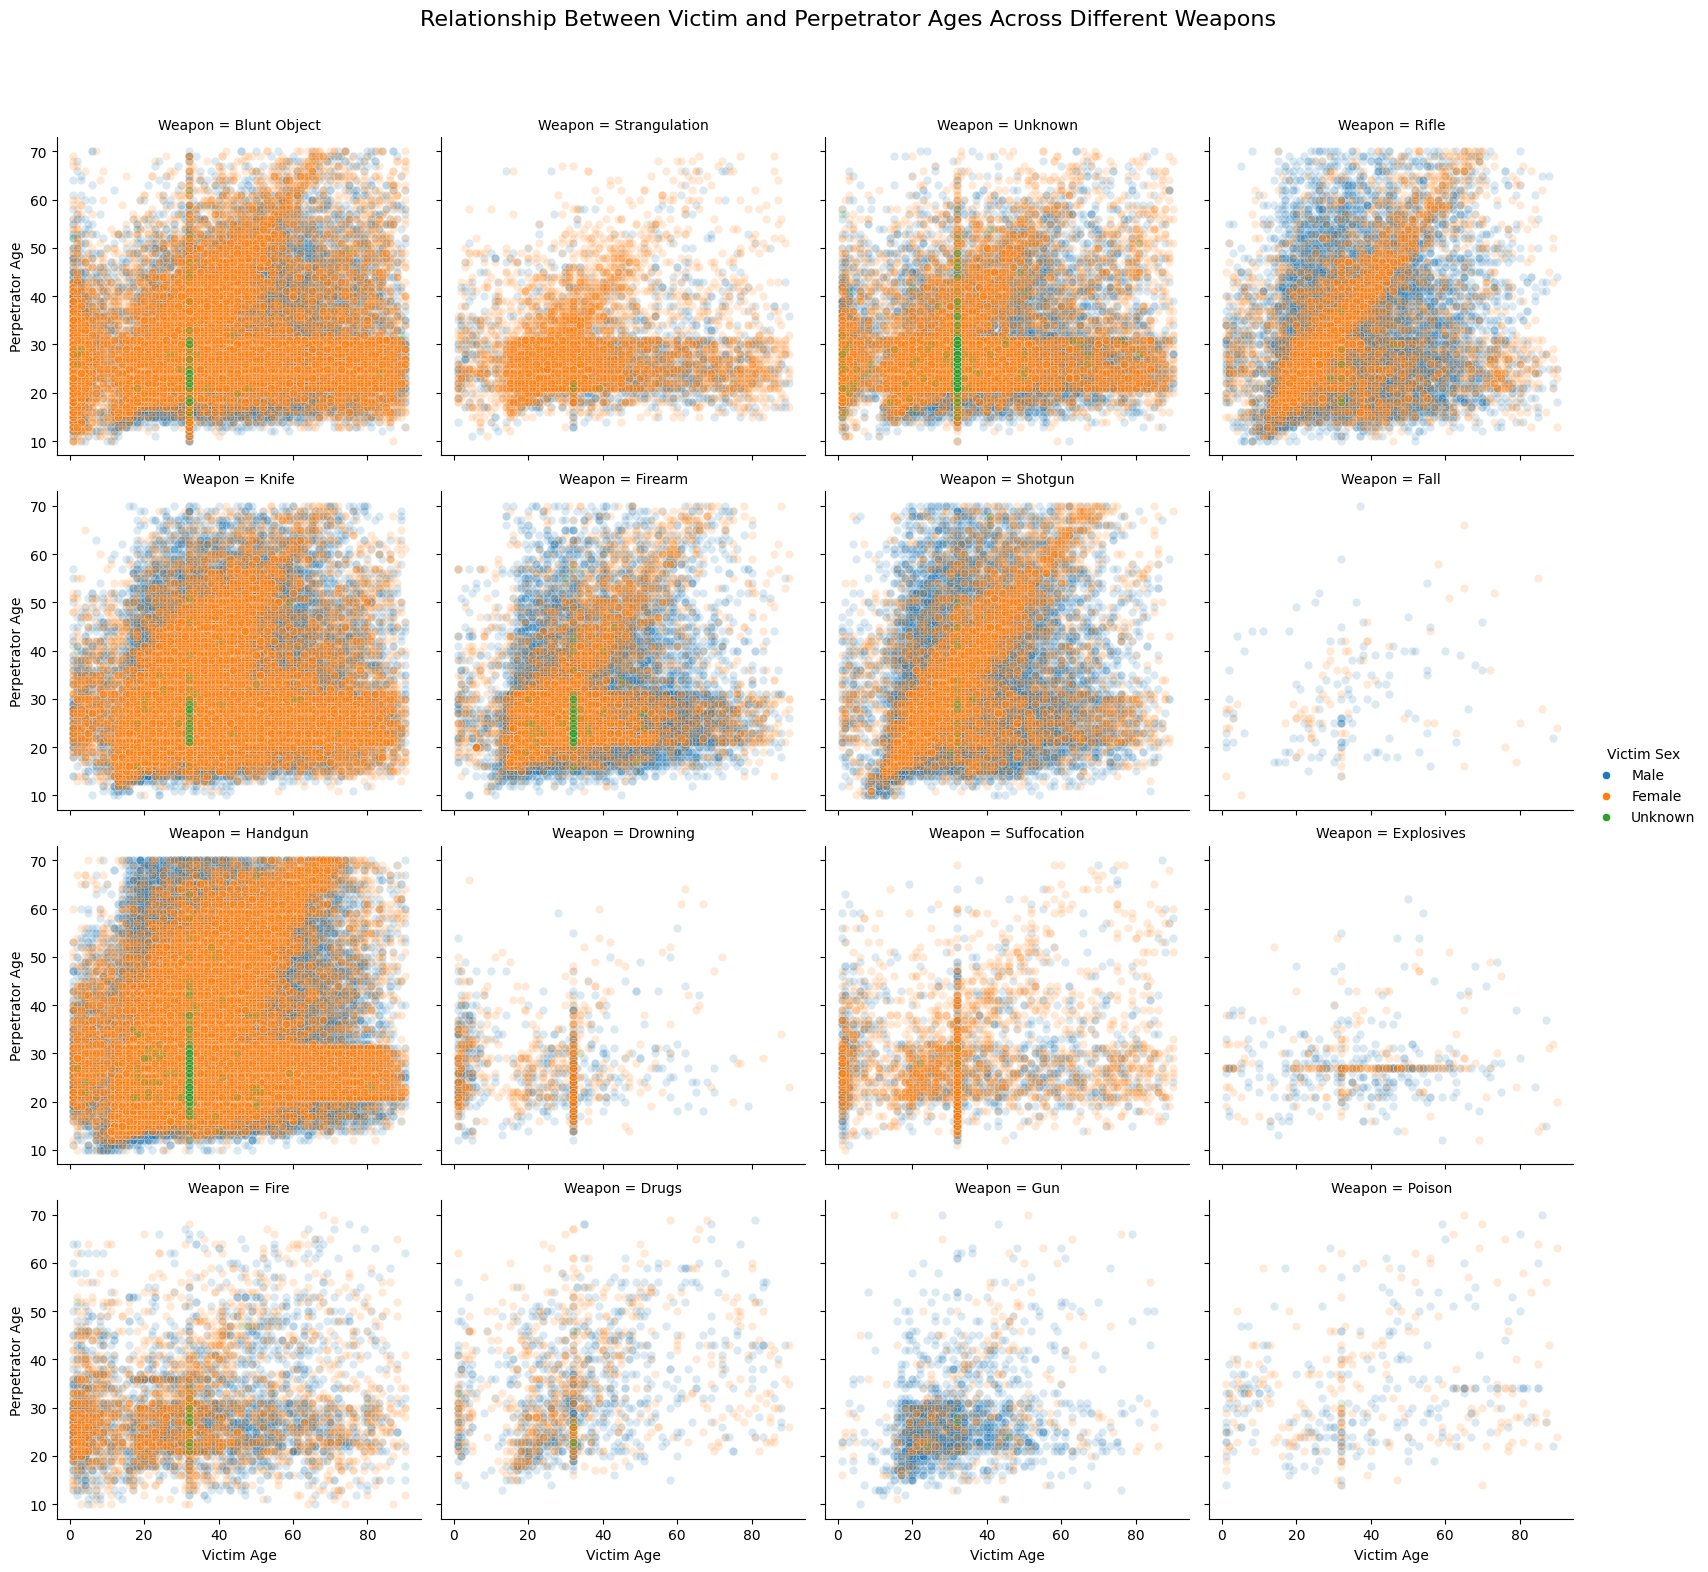

In [25]:
facet = sns.FacetGrid(df, col="Weapon", hue="Victim Sex", height=4, col_wrap=4, margin_titles=True)
facet.map(sns.scatterplot, "Victim Age", "Perpetrator Age", alpha=0.16)
facet.add_legend()
for handle in facet.legend.legend_handles:
    handle.set_alpha(1)
facet.set_axis_labels("Victim Age", "Perpetrator Age")
facet.fig.suptitle("Relationship Between Victim and Perpetrator Ages Across Different Weapons", fontsize=16)
facet.fig.subplots_adjust(top=0.9)
plt.show()

**Observations**

* *Overall Distribution Similarity Across Weapons*: The scatterplot across most weapon types shows a generally consistent pattern in the age distributions of both victims and perpetrators. This suggests that the age dynamics in homicides are largely similar, regardless of the weapon used. However, some distinctive patterns emerge for specific weapons, particularly when analyzing the data by gender.
* *Weapon = Rifle*:

   * Female Victims: There is a noticeable positive correlation between perpetrator age and victim age among female victims when a rifle is used. This suggests that older perpetrators tend to have older female victims.
   *  Male Victims: The distribution for males using rifles is more widespread, indicating that perpetrators of varying ages are involved in these cases, without a clear age correlation between the perpetrator age and victim age.
  
* *Weapon = Firearm & Shotgun*: Similar to rifles, both firearms and shotguns exhibit a pattern where male victims are more widely distributed across ages, while the female victim age relationship is less dispersed. This indicates that perpetrators are more likely to use these weapons across different age groups on male victims, while the cases involving females show a more specific age-related pattern.
* *Weapon = Explosives*: For female victims using explosives, there is a distinct linear band in the scatterplot around the late 20s on the y-axis (perpetrator age). This linearity suggests that female victims in their late 20s are consistently involved in cases where explosives are used, possibly indicating a demographic concentration or specific circumstances related to this weapon type.
* *Weapon = Drowning & Suffocation*: Both drowning and suffocation display unique vertical lines for female victims on the x-axis (Victim Age) at two specific age ranges: one at age 0 (infants) and another between ages 34-36. These vertical lines suggest that female victims in these specific age groups are particularly vulnerable to drowning and suffocation, perhaps reflecting certain demographic or situational vulnerabilities.

In [ ]:
zip -r Homicide.zip
